# Problem Statement

When a person plans to buy a pre-owned car. It is a daunting task to select a car based on its price and to check whether it is worth the price or not. Some of the prime factors that would affect the price are mileage, fuel type, power output, etc.  Even sellers want to know the perfect price that needs to be assigned to sell a pre-owned car.

A company has consulted us to determine the prime factors which would affect the price of a pre-owned car. we would use the existing data to predict the price of a pre-owned car by using machine learning algorithms. Exploratory data analysis will also be used to visualize the data and summarize the relationships among variables.


# Import Libraries

In [3001]:
# Import below Libraries
# Basic Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
# stats Libraries
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Libraries related to preprocessing of data
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
# Libraries related to model building
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


# Data Understanding

In [3002]:
# Provide Data Description
data_description=pd.read_excel("Cars_data_description.xlsx")
print(data_description.to_string())

            Attribute                                                               Description
0                Name                                            The brand and model of the car
1            Location  The location in which the car is being sold or is available for purchase
2                Year                                          The year or edition of the model
3   Kilometers_Driven     The total kilometers driven in the car by the previous owner(s) in KM
4           Fuel_Type                                          The type of fuel used by the car
5        Transmission                                  The type of transmission used by the car
6          Owner_Type                  Whether the ownership is Firsthand, Second hand or other
7             Mileage          The standard mileage offered by the car company in kmpl or km/kg
8              Engine                               The displacement volume of the engine in cc
9               Power                   

In [3003]:
# Read Data
data=pd.read_csv("Cars.csv")
df=data.copy()
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [3004]:
# Function to provide basic information about data
def data_info(data):
    rows,cols=data.shape
    print("Data Shape \nRows: {rows} \nColumns: {cols} ".format(rows=rows,cols=cols))
    print("-----------------------------------------------\nData Types")
    print(data.info())
    print("------------------------------------------------\nUnique Number of Values")
    print(data.nunique().sort_values(ascending=False))
    print("-------------------------------------------------\nDuplicated Values Check")
    print(data.duplicated().sum())
    print("--------------------------------------------------\nZero Variance Check")
    print(data.std())
    zv=data.std().to_dict()
    for i,j in zv.items():
        if j==0:
            print("{var} has zero variance ".format(var=i))

data_info(df)

Data Shape 
Rows: 5961 
Columns: 15 
-----------------------------------------------
Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 

In [3005]:
# change the data type of year column
df["Year"]=df["Year"].astype("object")

In [3006]:
# split the Name column into Brand and Model
def get_brand(s):
    return s.split()[0]

def get_model(s):
    return s.split()[1]

In [3007]:
df['Brand'] =df['Name'].apply(get_brand)
df['Model'] = df['Name'].apply(get_model)

In [3008]:
df.drop("Name",axis=1,inplace=True)

In [3009]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Brand,Model
0,Pune,2012,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00,Mahindra,Scorpio
1,Kochi,2018,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32,Maruti,Baleno
2,Bangalore,2013,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00,Mahindra,Xylo
3,Delhi,2014,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49,Hyundai,Grand
4,Delhi,2011,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40,Toyota,Innova


In [3010]:
# Analyse the data and the units provided in them
def analyse(data):
    z = data.str.findall("[a-zA-Z]+",)
    z = [i[0] for i in z if i is not np.nan]
    return set(z)

In [3011]:
analyse(df["Mileage"])

{'km', 'kmpl'}

In [3012]:
analyse(df["Engine"])

{'CC'}

In [3013]:
analyse(df["Power"])

{'bhp', 'null'}

In [3014]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Brand,Model
0,Pune,2012,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00,Mahindra,Scorpio
1,Kochi,2018,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32,Maruti,Baleno
2,Bangalore,2013,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00,Mahindra,Xylo
3,Delhi,2014,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49,Hyundai,Grand
4,Delhi,2011,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40,Toyota,Innova


In [3015]:
df["Fuel_Type"].value_counts()

Diesel      3188
Petrol      2705
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [3016]:
# transform the variables into their respective values by removing units
def transform(s):
    if type(s)==str:
        if 'kmpl' in s:
            s = s.strip('kmpl')
        if 'km/kg' in s:
            s = s.strip('km/kg')
            s = float(s)*1.8
     
    return s

In [3017]:
df["Mileage"]=df["Mileage"].apply(transform)

In [3018]:
df["Mileage"]=pd.to_numeric(df["Mileage"])

In [3019]:
df["Engine"]=df["Engine"].str.strip("CC")
df["Engine"]=pd.to_numeric(df["Engine"])

In [3020]:
df["Power"]=df["Power"].str.strip("bhp")
df["Power"]=pd.to_numeric(df["Power"],errors='coerce')

In [3021]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Brand,Model
0,Pune,2012,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,Mahindra,Scorpio
1,Kochi,2018,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,Maruti,Baleno
2,Bangalore,2013,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00,Mahindra,Xylo
3,Delhi,2014,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49,Hyundai,Grand
4,Delhi,2011,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40,Toyota,Innova


In [3022]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [3024]:
# Find missing values 
def missing_values(data):
    data_mv=data.isna().sum().to_dict()
    for i,j in data_mv.items():
        if j!=0:
            print("{var} has: \n{perc} missing values".format(var=i,perc=j))
            print("{perc}% of total missing values".format(var=i,perc=round(j/len(data),4)*100))
            print("Data Type :",data[i].dtype)
            print("---------------------------")

missing_values(df)

Location has: 
11 missing values
0.18% of total missing values
Data Type : object
---------------------------
Year has: 
2 missing values
0.03% of total missing values
Data Type : object
---------------------------
Kilometers_Driven has: 
8 missing values
0.13% of total missing values
Data Type : float64
---------------------------
Transmission has: 
27 missing values
0.44999999999999996% of total missing values
Data Type : object
---------------------------
Owner_Type has: 
15 missing values
0.25% of total missing values
Data Type : object
---------------------------
Mileage has: 
2 missing values
0.03% of total missing values
Data Type : float64
---------------------------
Engine has: 
17 missing values
0.29% of total missing values
Data Type : float64
---------------------------
Power has: 
135 missing values
2.27% of total missing values
Data Type : float64
---------------------------
Colour has: 
11 missing values
0.18% of total missing values
Data Type : object
------------------

*Columns other than New_Price have very less amount of missing values which need to be imputed appropriately.

In [2660]:
# Drop the variables having missing values more than 80%
df.drop("New_Price",axis=1,inplace=True)

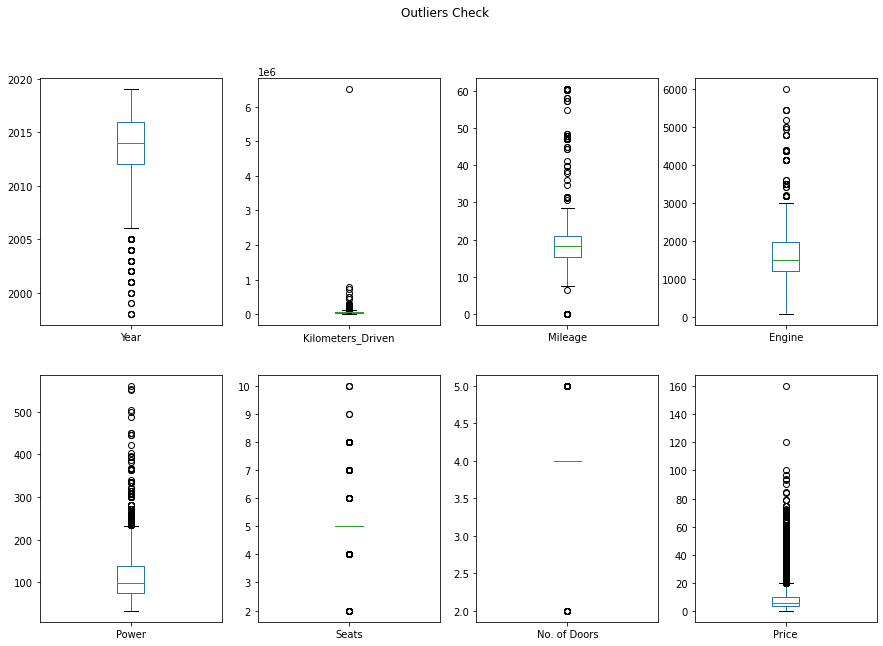

In [2661]:
# Check outliers through boxplot
df.plot(kind="box",subplots=True,layout=(2,4),figsize=(15,10),title="Outliers Check")
plt.show()

In [2662]:
# Check skewness
df.select_dtypes(np.number).skew()

Kilometers_Driven    58.514362
Mileage               1.546720
Engine                1.423085
Power                 1.920049
Seats                 1.852144
No. of Doors          1.350608
Price                 3.328447
dtype: float64

In [2663]:
## All the numerical variables have outliers, so we can impute them using their median values.

In [2664]:
# Treat missing values of numerical variables
df["Power"]=df["Power"].fillna(df["Power"].median())
df["Engine"]=df["Engine"].fillna(df["Engine"].median())
df["Mileage"]=df["Mileage"].fillna(df["Mileage"].median())
df["Kilometers_Driven"]=df["Kilometers_Driven"].fillna(df["Kilometers_Driven"].median())
df["Price"]=df["Price"].fillna(df["Price"].median())

In [2665]:
# Treat missing values of categorical variables
df["Seats"]=df["Seats"].fillna(df["Seats"].value_counts().max())
df["No. of Doors"]=df["No. of Doors"].fillna(df["No. of Doors"].value_counts().max())
df["Location"]=df["Location"].fillna(df["Location"].value_counts().max())
df["Transmission"]=df["Transmission"].fillna(df["Transmission"].value_counts().max())
df["Year"]=df["Year"].fillna(df["Year"].value_counts().max())
df["Colour"]=df["Colour"].fillna(df["Colour"].value_counts().max())
df["Owner_Type"]=df["Owner_Type"].fillna(df["Owner_Type"].value_counts().max())

In [2666]:
# Check missing values after imputation
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
Brand                0
Model                0
dtype: int64

# Data Description

In [2667]:
# Describe the data
df.describe(include="all")

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
count,5960,5960.000000,5.960000e+03,5960,5960,5960,5960.000000,5960.000000,5960.000000,5960,5960.000000,5960.000000,5960.000000,5960,5960
unique,12,NaN,NaN,5,3,5,NaN,NaN,NaN,4,NaN,NaN,NaN,30,207
top,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,White,NaN,NaN,NaN,Maruti,Swift
freq,781,NaN,NaN,3188,4224,4874,NaN,NaN,NaN,2115,NaN,NaN,NaN,1188,343
mean,NaN,2012.980705,5.870453e+04,NaN,NaN,NaN,18.401332,1622.322148,113.109143,NaN,9.469463,4.990604,9.529408,NaN,NaN
std,NaN,22.587774,9.165852e+04,NaN,NaN,NaN,5.326088,600.825746,53.364558,NaN,144.969531,67.602110,11.214871,NaN,NaN
min,NaN,793.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,NaN,2.000000,2.000000,0.440000,NaN,NaN
25%,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.260000,1198.000000,78.000000,NaN,5.000000,4.000000,3.500000,NaN,NaN
50%,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.200000,1493.000000,98.590000,NaN,5.000000,4.000000,5.665000,NaN,NaN
75%,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1984.000000,138.100000,NaN,5.000000,4.000000,10.000000,NaN,NaN


**Observations:**
* min Year being 793 is an anomaly and it needs to be treated.
* max Seats being 65 is an anomaly and it needs to be treated.
* **Maruti** brand is the most sold car brand, while the **swift** model is the most sold car model.
* the average engine cubic capacity is **1622cc.
* one can observe that at least 75% of Engines are less than 1984 CC, with the maximum value being 5988 CC. This indicates the presence of outliers. 
*  we can observe that we've car models manufactured across 22 years, from 1998 to 2019.
*  Although the max value is 160L, we can see that atleast 75% of the values are less than 10L.
*  The average mileage is 18.4 kmpl while the max mileage is 60.37 kmpl and the minimum is 0 kmpl - which seems to be an error in the data and we need to handle it.
* We can see that more than 13%(781) of observations are located in "Mumbai".
* Fuel type of more than 53%(3188) Engines is Diesel.
* Approximately 70%(4224) of the cars are manual transmission cars.

In [2668]:
# Value counts of all variables
for i in df.columns:
    print(df[i].value_counts())

Mumbai        781
Hyderabad     738
Kochi         646
Coimbatore    630
Pune          611
Delhi         549
Kolkata       526
Chennai       489
Jaipur        406
Bangalore     351
Ahmedabad     222
781            11
Name: Location, dtype: int64
2014.0    793
2016.0    740
2015.0    736
2013.0    642
2017.0    586
2012.0    573
2011.0    461
2010.0    338
2018.0    298
2009.0    196
2008.0    170
2007.0    122
2019.0    101
2006.0     75
2005.0     55
2004.0     28
2002.0     14
2003.0     13
2001.0      7
2000.0      4
1998.0      4
793.0       2
1999.0      2
Name: Year, dtype: int64
60000.0      81
45000.0      69
65000.0      66
50000.0      60
70000.0      60
55000.0      59
30000.0      54
52000.0      52
58000.0      49
75000.0      49
35000.0      48
80000.0      48
40000.0      47
90000.0      43
25000.0      41
100000.0     41
72000.0      41
62000.0      39
42000.0      38
48000.0      37
51000.0      36
54000.0      35
38000.0      35
37000.0      34
66000.0      34
29000.0 

In [2669]:
# Replacing Anomaly with variable's mode.
df["Location"].replace(781,"Mumbai",inplace=True)

In [2670]:
# Replacing Anomaly with variable's mode.
df["Year"].replace(793,2014,inplace=True)

In [2671]:
# Replacing zero mileage with its median.
df["Mileage"]=df["Mileage"].replace(0,18.2)

In [2672]:
df.groupby(by="Fuel_Type")["Price"].mean()

Fuel_Type
CNG          3.516786
Diesel      12.873940
Electric    12.875000
LPG          2.487000
Petrol       5.734316
Name: Price, dtype: float64

As the mean price of electric and diesel is similar and electric subclass has only 2 frequency it can be replaced as diesel to reduce the number of subclass. we can replace CNG and LPG with petrol for the same reason.

In [2673]:
df["Fuel_Type"].replace("LPG","Petrol",inplace=True)
df["Fuel_Type"].replace("CNG","Petrol",inplace=True)
df["Fuel_Type"].replace("Electric","Diesel",inplace=True)

In [2674]:
# Replacing Anomaly with variable's mode.
df["Transmission"].replace(4224,"Manual",inplace=True)

In [2675]:
# Replacing Anomaly with variable's mode.
df["Owner_Type"].replace(4874,"First",inplace=True)

In [2676]:
# Replacing Anomaly with variable's mode.
df["Colour"].replace(2115,"White",inplace=True)

In [2677]:
# Replacing Anomaly with variable's mode.
df["No. of Doors"].replace(5223,4,inplace=True)

In [2678]:
# Replacing Anomaly with variable's mode.
df["Seats"].replace(5012,5,inplace=True)

In [2679]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
0,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6.00,Mahindra,Scorpio
1,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8.32,Maruti,Baleno
2,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4.00,Mahindra,Xylo
3,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3.49,Hyundai,Grand
4,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6.40,Toyota,Innova


In [2680]:
df["Year"]=df["Year"].astype("object")
df["No. of Doors"]=df["No. of Doors"].astype("object")
df["Seats"]=df["Seats"].astype("object")

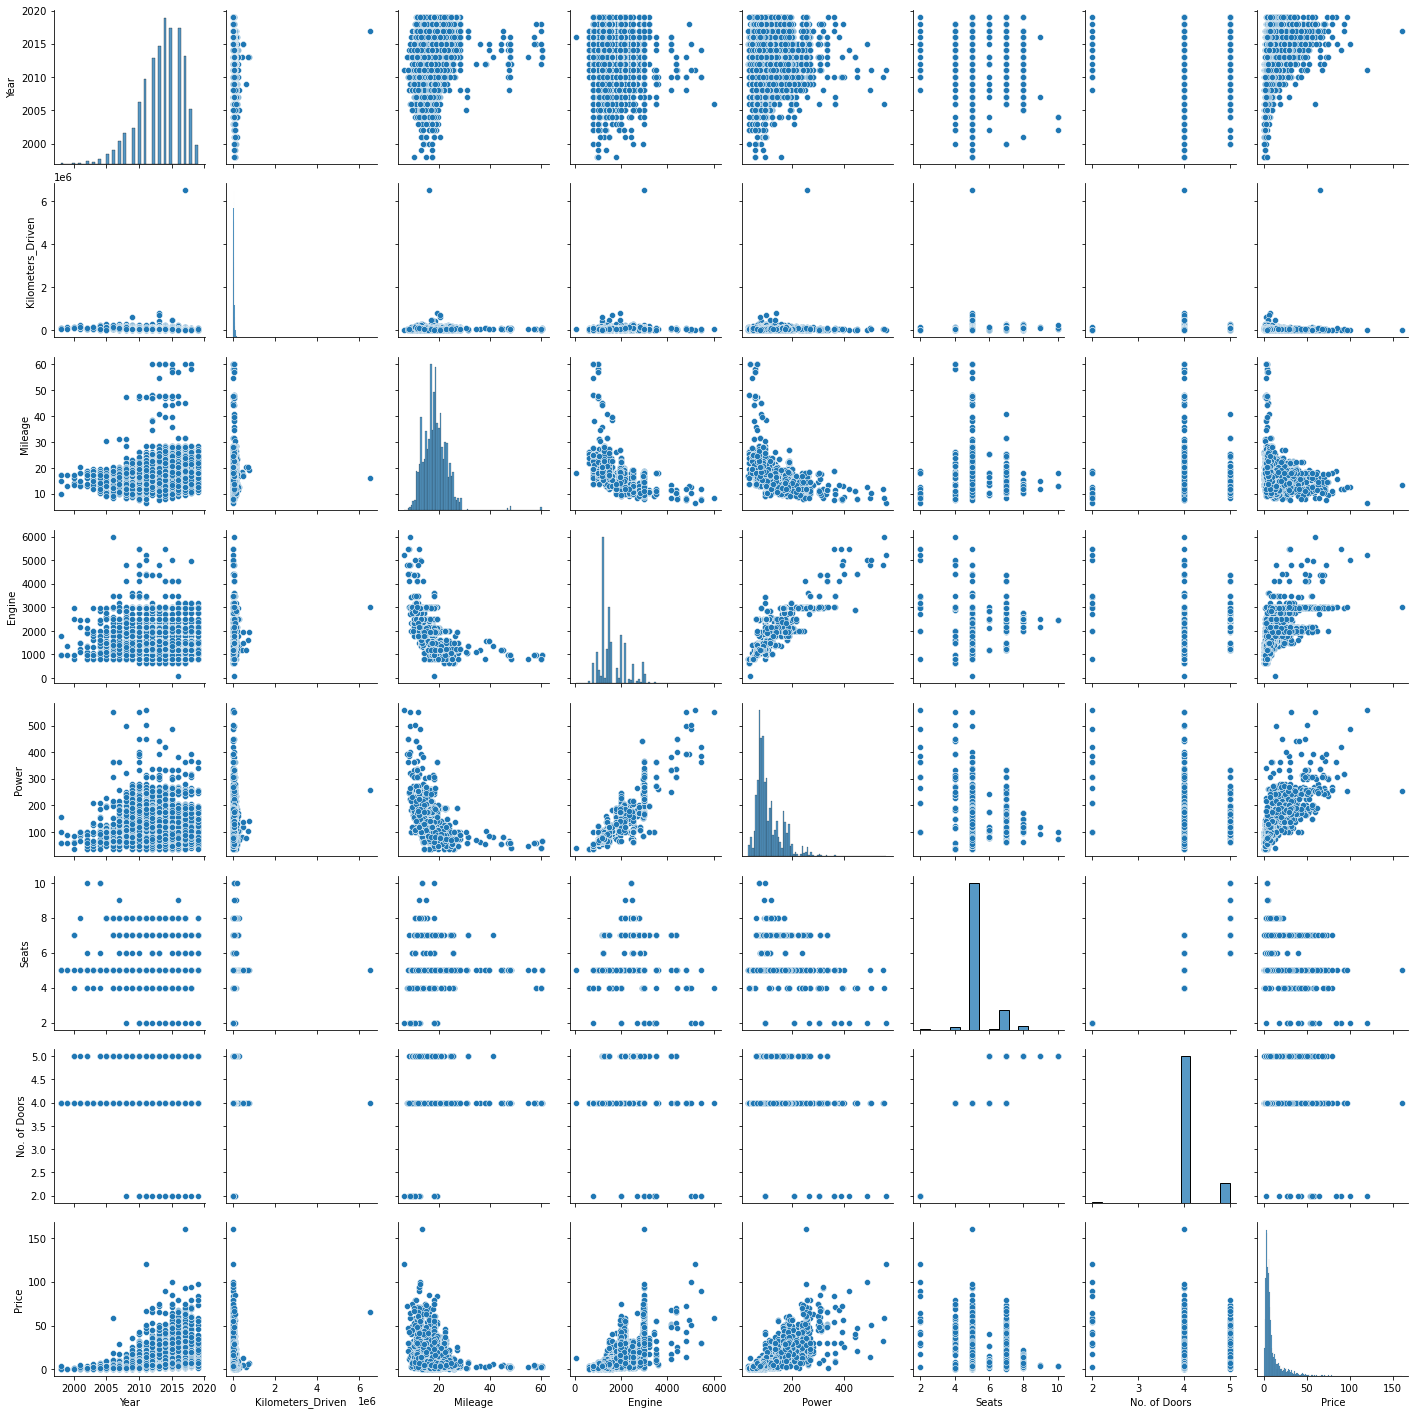

In [2681]:
#Pairplot to check the distribution of values
sns.pairplot(df)
plt.show()

In [2682]:
df_cl=df.copy()

# Exploratory Data Analysis

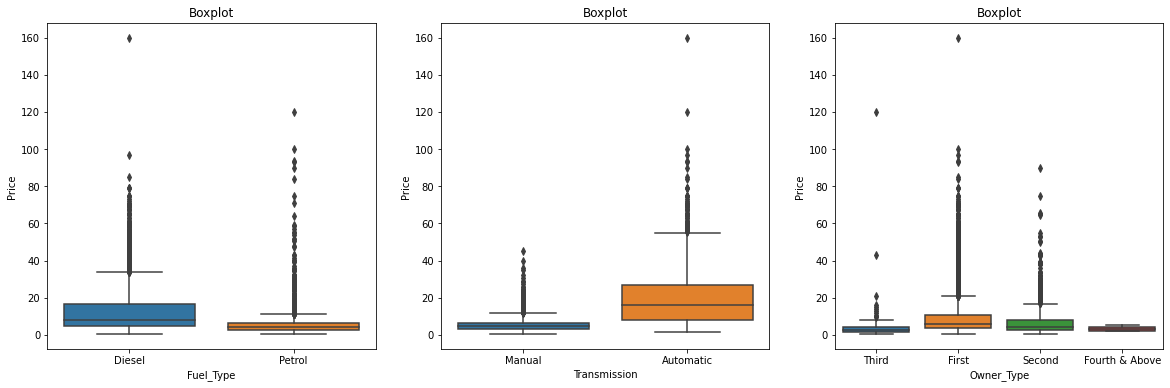

In [2683]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df["Fuel_Type"],df["Price"])
plt.title("Boxplot")
plt.subplot(1,3,2)
sns.boxplot(df["Transmission"],df["Price"])
plt.title("Boxplot")
plt.subplot(1,3,3)
sns.boxplot(df["Owner_Type"],df["Price"])
plt.title("Boxplot")
plt.show()

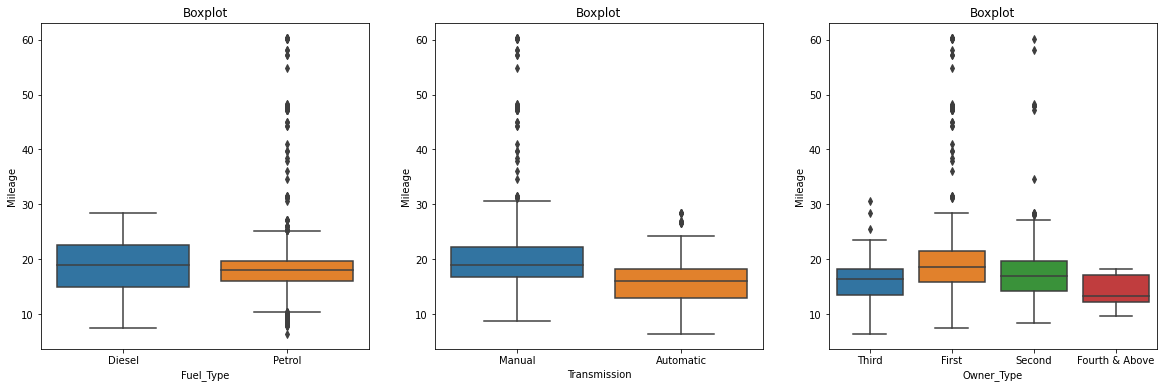

In [2684]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df["Fuel_Type"],df["Mileage"])
plt.title("Boxplot")
plt.subplot(1,3,2)
sns.boxplot(df["Transmission"],df["Mileage"])
plt.title("Boxplot")
plt.subplot(1,3,3)
sns.boxplot(df["Owner_Type"],df["Mileage"])
plt.title("Boxplot")
plt.show()

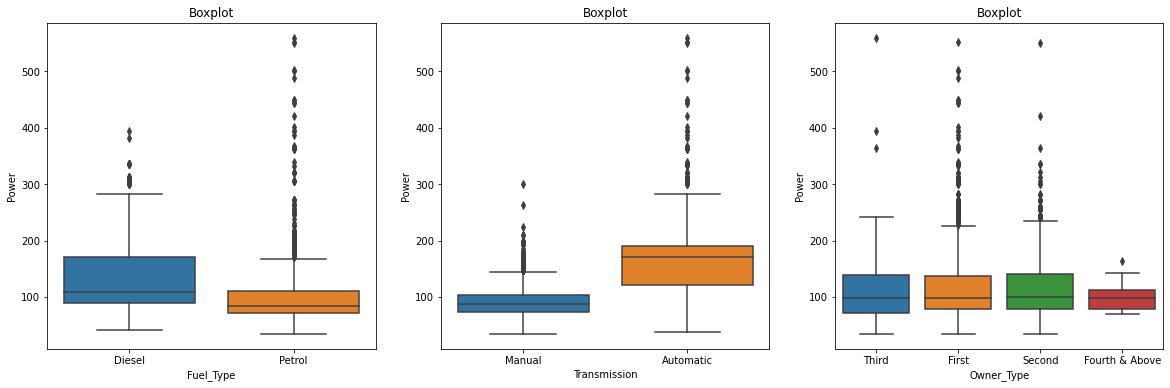

In [2685]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df["Fuel_Type"],df["Power"])
plt.title("Boxplot")
plt.subplot(1,3,2)
sns.boxplot(df["Transmission"],df["Power"])
plt.title("Boxplot")
plt.subplot(1,3,3)
sns.boxplot(df["Owner_Type"],df["Power"])
plt.title("Boxplot")
plt.show()

Observations:
* Diesel cars have the higher average price compared to petrol, since they produce higher power and mileage comparatively.
* Automatic transmission cars are highly expensive in comparison to Manual transmission as they produce better power output       comparatively, even though they provide lesser mileage comparetively.
* As the ownership type moves from the first to second, then to third and beyond, the price is also falling down, which is       expected naturally.

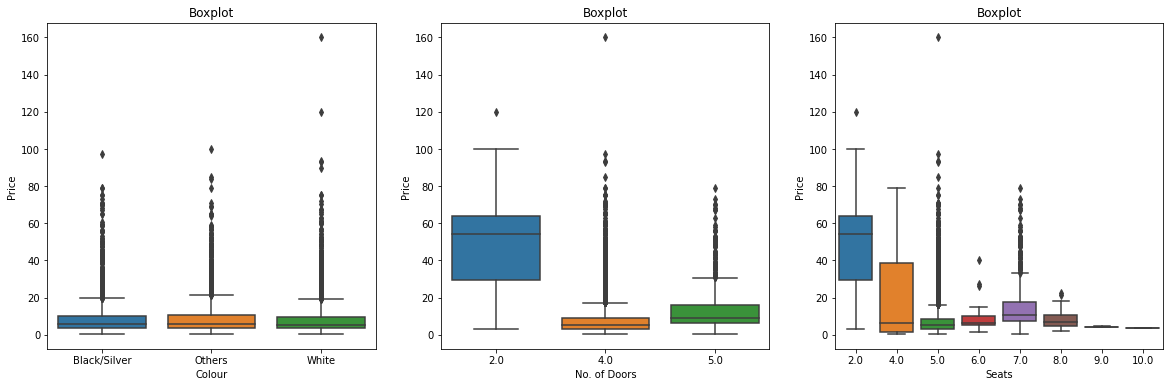

In [2686]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df["Colour"],df["Price"])
plt.title("Boxplot")
plt.subplot(1,3,2)
sns.boxplot(df["No. of Doors"],df["Price"])
plt.title("Boxplot")
plt.subplot(1,3,3)
sns.boxplot(df["Seats"],df["Price"])
plt.title("Boxplot")
plt.show()

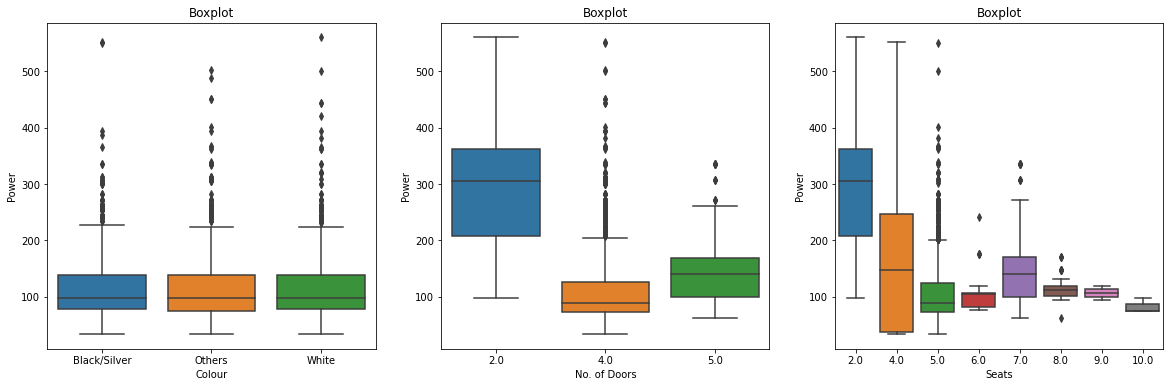

In [2687]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df["Colour"],df["Power"])
plt.title("Boxplot")
plt.subplot(1,3,2)
sns.boxplot(df["No. of Doors"],df["Power"])
plt.title("Boxplot")
plt.subplot(1,3,3)
sns.boxplot(df["Seats"],df["Power"])
plt.title("Boxplot")
plt.show()

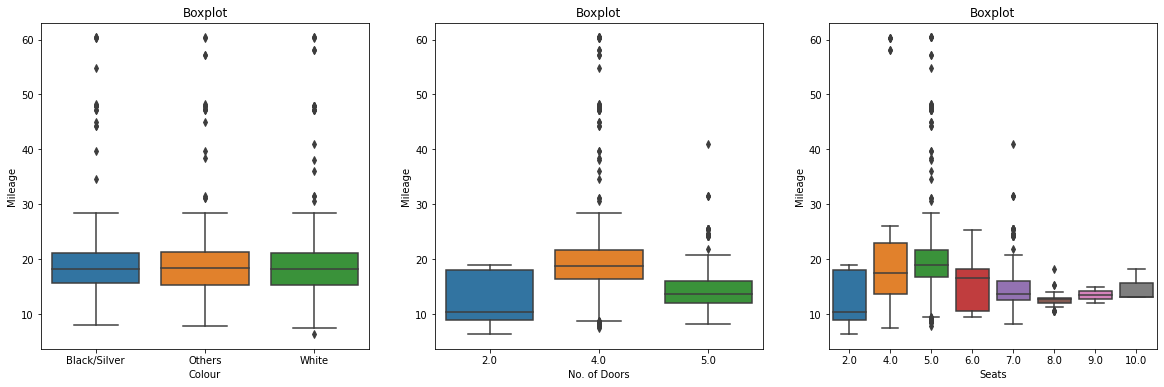

In [2688]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df["Colour"],df["Mileage"])
plt.title("Boxplot")
plt.subplot(1,3,2)
sns.boxplot(df["No. of Doors"],df["Mileage"])
plt.title("Boxplot")
plt.subplot(1,3,3)
sns.boxplot(df["Seats"],df["Mileage"])
plt.title("Boxplot")
plt.show()

Observations:
* Colours have no impact on price as expected.
* Average price of 2 doors/2 seats cars is higher comparatively, as they provide higher power output.

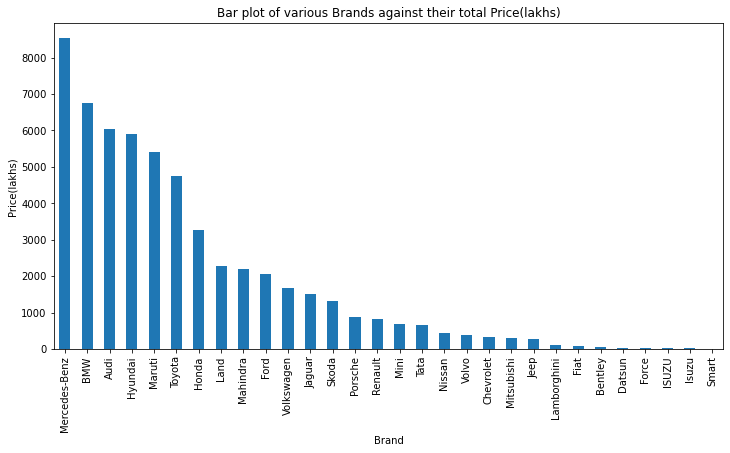

In [2689]:
df.groupby("Brand")["Price"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(12,6))
plt.ylabel("Price(lakhs)")
plt.title("Bar plot of various Brands against their total Price(lakhs)")
plt.show()

In [2690]:
# Mercedes-Benz brand has highest total price comparatively.

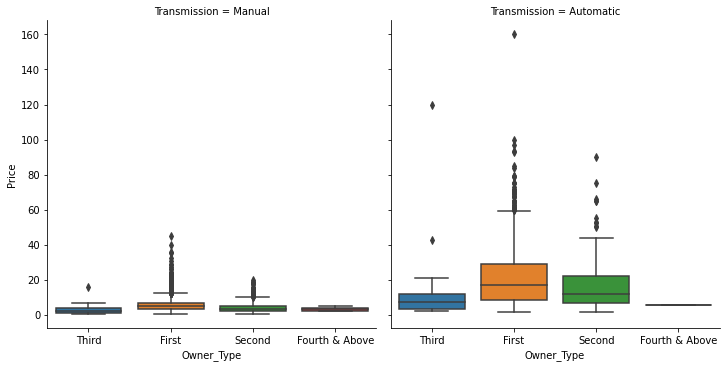

In [2691]:
sns.factorplot(x="Owner_Type",y="Price",data=df,kind="box",col="Transmission")
plt.show()

In [2692]:
# Automatic cars with first and second owner type have higher price comparatively.

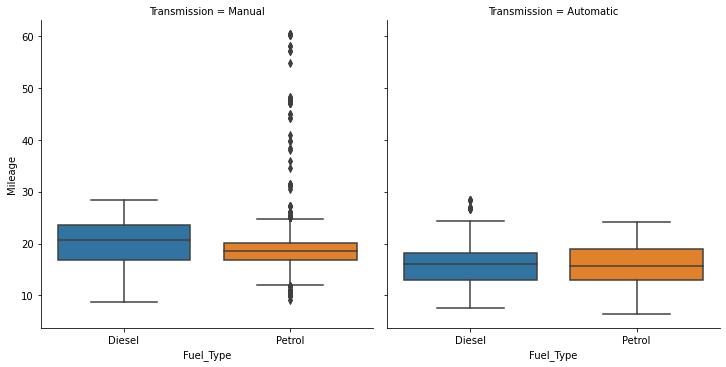

In [2693]:
sns.factorplot(x="Fuel_Type",y="Mileage",data=df,kind="box",col="Transmission")
plt.show()

In [2694]:
# Manual transmission cars have better mileage as expected.

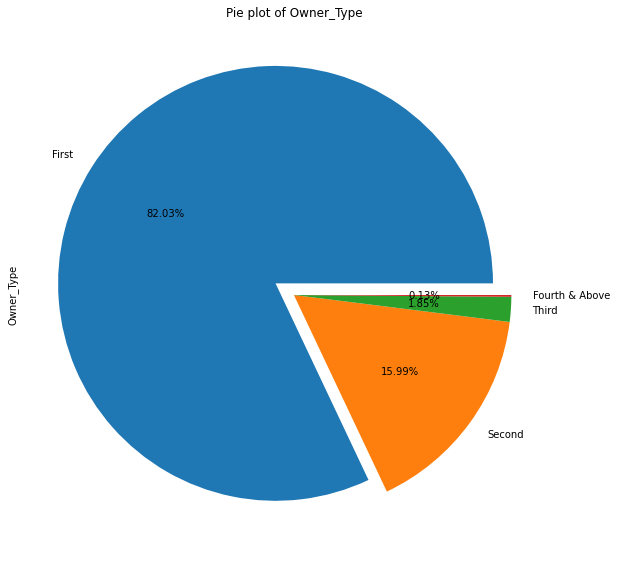

In [2695]:
df['Owner_Type'].value_counts().plot(kind="pie",figsize=(10,10),autopct='%1.2f%%',explode=[0.1,0,0,0])
plt.title("Pie plot of Owner_Type")
plt.show()

In [2696]:
# One can observe that most of cars sold are as firsthand.

# Outliers Analysis

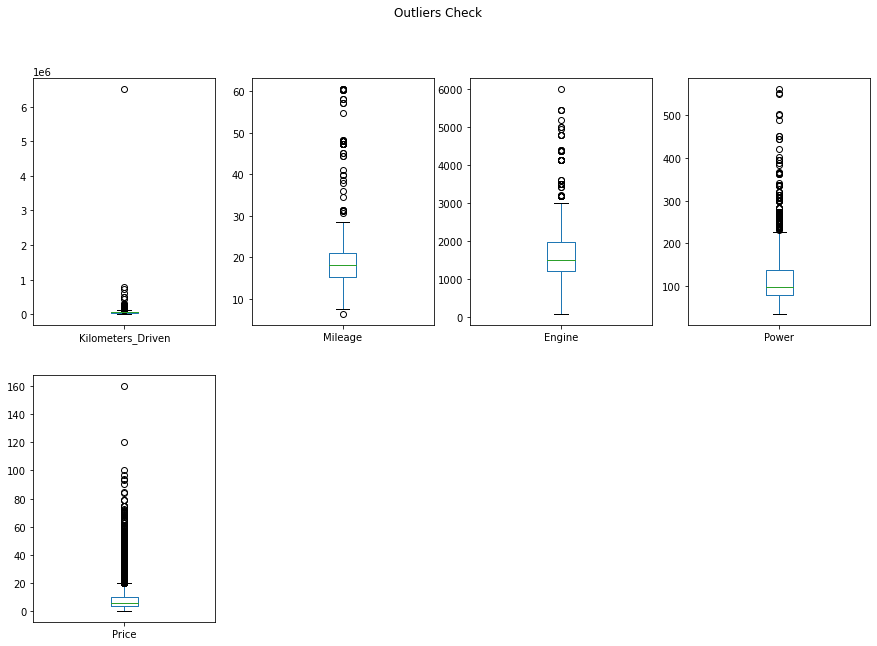

In [2697]:
df.select_dtypes(np.number).plot(kind="box",subplots=True,layout=(2,4),figsize=(15,10),title="Outliers Check")
plt.show()

In [2698]:
df.shape

(5960, 15)

In [2699]:
# Outliers Treatment
Q1= df.quantile(.25)
Q3= df.quantile(.75)
IQR= Q3-Q1
df= df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [2700]:
df.shape

(4953, 15)

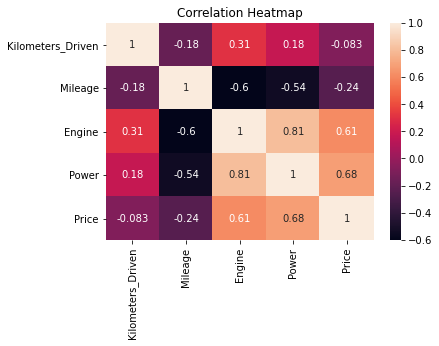

In [2701]:
# Multicollinearity check
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [2702]:
# Drop column responsible for multicollinearity 
df.drop("Engine",axis=1,inplace=True)

# Feature Transformation

In [2703]:
df.select_dtypes(np.number).skew()

Kilometers_Driven    0.386873
Mileage              0.097557
Power                1.052937
Price                1.341653
dtype: float64

In [2704]:
# Transform the variables to reduce skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df["Power"]=pt.fit_transform(df[["Power"]])
df["Price"]=pt.fit_transform(df[["Price"]])

In [2705]:
df.select_dtypes(np.number).skew()

Kilometers_Driven    0.386873
Mileage              0.097557
Power               -0.003435
Price                0.003790
dtype: float64

# Feature Scaling

In [2706]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Colour,Seats,No. of Doors,Price,Brand,Model
0,Pune,2012,99000.0,Diesel,Manual,Third,12.05,0.759107,Black/Silver,8,5,0.248420,Mahindra,Scorpio
1,Kochi,2018,18678.0,Petrol,Manual,First,21.10,0.215800,Others,5,4,0.784794,Maruti,Baleno
3,Delhi,2014,45000.0,Diesel,Manual,First,24.00,-0.895750,White,5,4,-0.608933,Hyundai,Grand
4,Delhi,2011,65000.0,Diesel,Manual,First,12.80,0.275616,Others,8,5,0.353532,Toyota,Innova
5,Kochi,2018,15135.0,Petrol,Manual,First,17.50,-0.150636,White,5,4,0.967409,Honda,WRV


In [2707]:
# Scale the numerical variables
from sklearn.preprocessing import StandardScaler
df_num=df.select_dtypes(np.number)
ss=StandardScaler()
for i in df_num.columns:
    df[i]=ss.fit_transform(df_num[[i]])
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Colour,Seats,No. of Doors,Price,Brand,Model
0,Pune,2012,1.625611,Diesel,Manual,Third,-1.728284,0.759107,Black/Silver,8,5,0.248420,Mahindra,Scorpio
1,Kochi,2018,-1.333449,Petrol,Manual,First,0.566316,0.215800,Others,5,4,0.784794,Maruti,Baleno
3,Delhi,2014,-0.363747,Diesel,Manual,First,1.301602,-0.895750,White,5,4,-0.608933,Hyundai,Grand
4,Delhi,2011,0.373052,Diesel,Manual,First,-1.538124,0.275616,Others,8,5,0.353532,Toyota,Innova
5,Kochi,2018,-1.463973,Petrol,Manual,First,-0.346453,-0.150636,White,5,4,0.967409,Honda,WRV


# Encoding

In [2754]:
df_en=df.iloc[:,[2,6,7,9,10,11]]
df_en.head()

,Kilometers_Driven,Mileage,Power,Seats,No. of Doors,Price
0,1.625611,-1.728284,0.759107,8,5,0.248420
1,-1.333449,0.566316,0.215800,5,4,0.784794
3,-0.363747,1.301602,-0.895750,5,4,-0.608933
4,0.373052,-1.538124,0.275616,8,5,0.353532
5,-1.463973,-0.346453,-0.150636,5,4,0.967409


In [2755]:
df_cat=df.select_dtypes("object")
df_cat.drop(["Seats","No. of Doors"],axis=1,inplace=True)

In [2756]:
df_cat["Owner_Type"].value_counts()

First             4062
Second             794
Third               92
Fourth & Above       5
Name: Owner_Type, dtype: int64

In [2757]:
dict1={"Fourth & Above":"0","Third":"1","Second":"2","First":"3"}

In [2758]:
df_cat["Owner_type"]=df_cat["Owner_Type"].map(dict1)
df_cat.drop("Owner_Type",axis=1,inplace=True)

In [2759]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat.columns:
    df_cat[i]=le.fit_transform(df_cat[[i]])


In [2760]:
df_le=pd.concat([df_en,df_cat],axis=1)
df_le.head()

,Kilometers_Driven,Mileage,Power,Seats,No. of Doors,Price,Location,Year,Fuel_Type,Transmission,Colour,Brand,Model,Owner_type
0,1.625611,-1.728284,0.759107,8,5,0.248420,10,14,0,1,0,12,128,1
1,-1.333449,0.566316,0.215800,5,4,0.784794,7,20,1,1,1,13,21,3
3,-0.363747,1.301602,-0.895750,5,4,-0.608933,4,16,0,1,2,8,70,3
4,0.373052,-1.538124,0.275616,8,5,0.353532,4,13,0,1,1,22,77,3
5,-1.463973,-0.346453,-0.150636,5,4,0.967409,7,20,1,1,2,7,150,3


In [2761]:
df_le.dtypes

Kilometers_Driven    float64
Mileage              float64
Power                float64
Seats                 object
No. of Doors          object
Price                float64
Location               int32
Year                   int32
Fuel_Type              int32
Transmission           int32
Colour                 int32
Brand                  int32
Model                  int32
Owner_type             int32
dtype: object

In [2762]:
df_le["Seats"]=pd.to_numeric(df_le["Seats"])
df_le["No. of Doors"]=pd.to_numeric(df_le["No. of Doors"])

# Multicollinearity

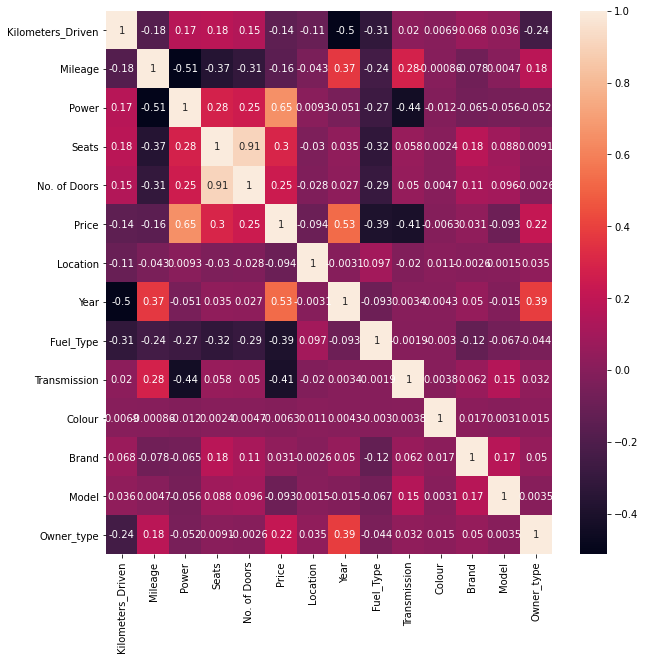

In [2763]:
plt.figure(figsize=(10,10))
sns.heatmap(df_le.corr(),annot=True)
plt.show()

In [2764]:
df_le.drop("No. of Doors",axis=1,inplace=True)

In [2765]:
df_fle=df_le.copy()

# Model Building

In [2766]:
def get_results(data):
    x=data.drop("Price",axis=1)
    y=data["Price"]
    x=sm.add_constant(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
    model=sm.OLS(y_train,x_train).fit()
    print(model.summary())
    print("----------------------------------")
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    train_mse=mean_squared_error(y_train,y_pred_train)
    test_mse=mean_squared_error(y_test,y_pred_test)
    train_rmse=np.sqrt(train_mse)
    test_rmse=np.sqrt(test_mse)
    
    print("train_mse: ",train_mse)
    print("test_mse: ",test_mse)
    print("train_rmse: ",train_rmse)
    print("test_rmse: ",test_rmse)
    
get_results(df_fle)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1502.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:59:02   Log-Likelihood:                -2244.3
No. Observations:                3962   AIC:                             4515.
Df Residuals:                    3949   BIC:                             4596.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3148      0.08

In [2767]:
# removing insignificant variables based on p_value(variables having p_val greater than 0.05)
df_fle.drop(["Colour","Brand"],axis=1,inplace=True)

In [2768]:
get_results(df_fle)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1803.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:59:02   Log-Likelihood:                -2244.8
No. Observations:                3962   AIC:                             4512.
Df Residuals:                    3951   BIC:                             4581.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3158      0.08

In [2769]:
# Removing variables based on VIF(multicollinearity check)

In [2770]:
def get_vif(data):

    dfnum=data.select_dtypes(include=np.number)

    for j in range(len(dfnum.columns)):
        vif=pd.DataFrame()
        vif["vif_factor"]=[variance_inflation_factor(dfnum.values,i) for i in range(len(dfnum.columns))]
        vif["features"]=dfnum.columns
        vif=vif.sort_values("vif_factor",ascending=False).reset_index()
        multi=vif[vif["vif_factor"]>80]

        if multi.empty==False:
            multi2=multi.sort_values("vif_factor",ascending=False)
        else:
            print(vif)
            break
        
        if multi2.empty==False:
            dfnum=dfnum.drop(multi2["features"].iloc[0],axis=1)
        else:
            pass

get_vif(df_fle)

    index  vif_factor           features
0       6   66.625374               Year
1       3   54.973269              Seats
2      10   39.477119         Owner_type
3       8    7.592698       Transmission
4       5    5.075070           Location
5       7    4.594880          Fuel_Type
6       4    4.582586              Price
7       9    3.993643              Model
8       2    3.012167              Power
9       1    2.848739            Mileage
10      0    1.601755  Kilometers_Driven


In [2771]:
## removing variables having higher VIF and lower coefficient.
df_fle=df_fle.drop(["Seats","Owner_type"],axis=1)

In [2772]:
get_results(df_fle)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2212.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:59:03   Log-Likelihood:                -2276.4
No. Observations:                3962   AIC:                             4571.
Df Residuals:                    3953   BIC:                             4627.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8197      0.05

## Feature Selection

In [2773]:
x=df_fle.drop("Price",axis=1)
y=df_fle["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lin=LinearRegression()
lin_back=RFE(estimator=lin,n_features_to_select=5)
rfemodel=lin_back.fit(x_train,y_train)
pd.DataFrame(rfemodel.ranking_,x_train.columns)

,0
Kilometers_Driven,2
Mileage,1
Power,1
Location,3
Year,1
Fuel_Type,1
Transmission,1
Model,4


In [2774]:
df_fle.drop(["Location","Model","Kilometers_Driven"],axis=1,inplace=True)

In [2775]:
get_results(df_fle)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     3305.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:59:03   Log-Likelihood:                -2387.5
No. Observations:                3962   AIC:                             4787.
Df Residuals:                    3956   BIC:                             4825.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.1807      0.042    -52.303   

# Cross Validation

In [2776]:
x=df_fle2.drop("Price",axis=1)
y=df_fle2["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = x_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')
print("Score: ",scores.mean()*100)
print('Bias error:',(1-np.mean(scores))*100)
print('Variance error:',(np.std(scores)/np.mean(scores))*100)

Score:  80.25336446518236
Bias error: 19.746635534817646
Variance error: 0.42932908439705236


# Assumptions

Now, use the model with significant variabels to check some of the assumptions based on the residuals of linear regression:
1. Linear Relationship Between Dependent and Independent Variable
2. Autocorrelation
3. Heteroscedasticity
4. Tests of Normality 

## Linear Relationship between Dependent and Independent Variable

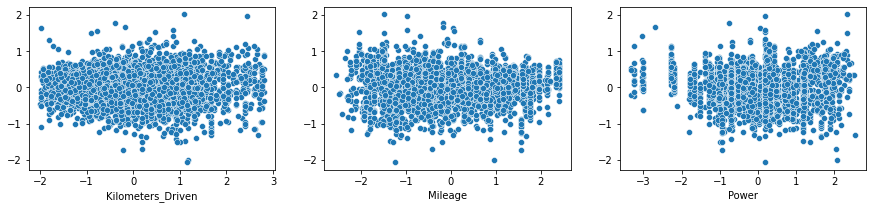

In [2801]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,3))

for variable,subplot in zip(x.columns[0:3],ax.flatten()):
    sns.scatterplot(x[variable],model.resid,ax=subplot)

one can observe that there is no pattern seen. thus we can conclude that there is a linear relationship between the continuous variable and the target variable.

## Autocorrelation

one can observe that the value obtained from the Durbin-Watson test statistic is 2. so we can infer that there is no autocorrelation.

## Heteroskedasticity

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.
The test hypothesis for the Breusch-Pagan test is given as:

H0 : There is homoscedasticity present in the data 

H1 : There is a heteroscedasticity present in the data 

In [2778]:
test=sms.het_breuschpagan(model.resid, model.model.exog)
print("statistic: ",test[2])
print("p_val: ",test[3])

statistic:  49.07276361100879
p_val:  2.981247808753267e-67


In [2779]:
#The p-value is less than 0.05. thus, we can conclude that there is heteroskedasticity present in the data.

# Normality Test

The Shapiro Wilk test is used to check the normality of the residuals.
The test hypothesis is given as

H0 :Residuals are normally distributed 

H1 :Residuals are not normally distributed 

In [2780]:
stat, p_value = shapiro(model.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9926226735115051
P-Value: 2.226203162786211e-13


From the above test we can see that the p-value is less than 0.05, thus we can say that the residuals are not normally distributed.

In [2803]:
df_en=df_le.copy()

# Tree Based Models

we will fit the cleand data to decision tree model and ensemble models to reduce the bias error and variance error.  

# Decision Tree Regressor

In [2804]:
# train test split of the data
x=df_en.drop("Price",axis=1)
y=df_en["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [2805]:
dt_regressor=DecisionTreeRegressor(random_state=12)
dt_regressor=dt_regressor.fit(x_train,y_train)

In [2806]:
def get_metrics(model):

    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    train_mse=mean_squared_error(y_train,y_pred_train)
    test_mse=mean_squared_error(y_test,y_pred_test)
    train_rmse=np.sqrt(train_mse)
    test_rmse=np.sqrt(test_mse)
    train_mape=(np.mean(np.abs((y_train-y_pred_train)/(y_train)))*100)
    test_mape=(np.mean(np.abs((y_test-y_pred_test)/(y_test)))*100)
    print("train R2:",model.score(x_train,y_train)*100)
    print("test R2:",model.score(x_test,y_test)*100)
    print("train_mse: ",train_mse)
    print("test_mse: ",test_mse)
    print("train_rmse: ",train_rmse)
    print("test_rmse: ",test_rmse)
    print("train_mape: ",train_mape)
    print("test_mape: ",test_mape)
               
get_metrics(dt_regressor)

train R2: 99.99952573619143
test R2: 80.92254591515983
train_mse:  4.797733084493375e-06
test_mse:  0.18188079474794464
train_rmse:  0.0021903728186072283
test_rmse:  0.4264748465594948
train_mape:  0.00795793835725941
test_mape:  164.70706998791968


In [2807]:
# Feature Selection
feat_imp = pd.DataFrame({'Features':x_train.columns,'Importances':dt_regressor.feature_importances_})
feat_imp.sort_values(by="Importances",ascending=False).head(30)

,Features,Importances
2,Power,0.480254
5,Year,0.334838
1,Mileage,0.050604
10,Model,0.038119
0,Kilometers_Driven,0.026771
4,Location,0.024405
6,Fuel_Type,0.014081
9,Brand,0.013857
8,Colour,0.004565
11,Owner_type,0.004411


In [2808]:
df_en.drop(["Transmission","Seats","Colour","Owner_type"],axis=1,inplace=True)

In [2809]:
df_en.head()

,Kilometers_Driven,Mileage,Power,Price,Location,Year,Fuel_Type,Brand,Model
0,1.625611,-1.728284,0.759107,0.248420,10,14,0,12,128
1,-1.333449,0.566316,0.215800,0.784794,7,20,1,13,21
3,-0.363747,1.301602,-0.895750,-0.608933,4,16,0,8,70
4,0.373052,-1.538124,0.275616,0.353532,4,13,0,22,77
5,-1.463973,-0.346453,-0.150636,0.967409,7,20,1,7,150


In [2810]:
x=df_en.drop("Price",axis=1)
y=df_en["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [2811]:
# Hyperparameter Tuning
tuned_paramaters = { 'max_depth': [2,3,4,6],
                     'min_samples_split': [2,4,6],
                     'min_samples_leaf': [2,4,6]}

dtr= DecisionTreeRegressor(random_state = 10)
tree_grid = GridSearchCV(estimator = dtr, 
                         param_grid = tuned_paramaters, 
                         cv = 10)
dtr_tuned = tree_grid.fit(x_train, y_train)
print("the best parameters are :",dtr_tuned.best_params_)
print("the best score :",dtr_tuned.best_score_)

the best parameters are : {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}
the best score : 0.804024723621151


In [2812]:
dtr_tuned= DecisionTreeRegressor(max_depth=6,min_samples_split=2,min_samples_leaf=4,random_state = 10)
dtr_tuned=dtr_tuned.fit(x_train,y_train)

In [2813]:
get_metrics(dtr_tuned)

train R2: 83.64609266966548
test R2: 79.3751976587858
train_mse:  0.1654388988608238
test_mse:  0.1966329167747928
train_rmse:  0.40674180859708015
test_rmse:  0.4434331029307496
train_mape:  122.50107955135753
test_mape:  152.38746762913416


In [2814]:
#cross Validation
dtr_tuned= DecisionTreeRegressor(max_depth=6,min_samples_split=6,min_samples_leaf=2,random_state = 10)
scores = cross_val_score(estimator = dtr_tuned,X = x_train,y = y_train,cv = 5,scoring="r2")
print(scores.mean()*100)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))


79.81339091045207
Bias error: 0.20186609089547924
Variance error: 0.019901953208229337


# Random Forest Regressor

In [2815]:
#Pruned Random Forest Regressor
rfr= RandomForestRegressor(random_state=12,n_estimators=50,max_depth=6)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=50, random_state=12)

In [2816]:
get_metrics(rfr)

train R2: 86.89012932846687
test R2: 83.9135010529765
train_mse:  0.13262167409272482
test_mse:  0.1533656011009144
train_rmse:  0.36417258833240707
test_rmse:  0.3916192042034129
train_mape:  109.17525414234441
test_mape:  136.40165159483888


# Gradient Boosting Regressor

In [2817]:
# Pruned Gradient Boosting Regressor
gbr=GradientBoostingRegressor(learning_rate=0.1,random_state=10)
gbr=gbr.fit(x_train,y_train)

In [2818]:
get_metrics(gbr)

train R2: 91.76211335330844
test R2: 88.92657360801317
train_mse:  0.08333585780084383
test_mse:  0.10557192714503147
train_rmse:  0.28867950706768886
test_rmse:  0.3249183391946836
train_mape:  87.13328950807607
test_mape:  97.42560103373233


In [2937]:
# Hyperparameter Tuning
tuned_paramaters = { "n_estimators": [50,60,70,80],'min_samples_split': [2,4,6],'min_samples_leaf': [2,4,6],"max_depth":[2,3]}
gbr=GradientBoostingRegressor(random_state=10)
tree_grid = GridSearchCV(estimator = gbr, 
                         param_grid = tuned_paramaters, 
                         cv = 10)
gbr_tuned = tree_grid.fit(x_train, y_train)
print("the best parameters are :",gbr_tuned.best_params_)
print("the best score :",gbr_tuned.best_score_)

the best parameters are : {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 80}
the best score : 0.8907140290893818


In [2943]:
# fit the tuned model
gbr_tuned=GradientBoostingRegressor(n_estimators=80,max_depth=3,learning_rate=0.1,min_samples_split=2,
                              min_samples_leaf=6,random_state=55)
gbr_tuned=gbr_tuned.fit(x_train,y_train)

In [2944]:
get_metrics(gbr_tuned)

train R2: 90.63617649047865
test R2: 88.23889409443763
train_mse:  0.09472602597355051
test_mse:  0.11212813196695215
train_rmse:  0.3077759346887773
test_rmse:  0.33485538963402117
train_mape:  92.32522955577348
test_mape:  102.72733610722116


In [2950]:
# extract important features out of gradientboostingregressor.
feat_imp = pd.DataFrame({'Features':x_train.columns,'Importances':gbr_tuned.feature_importances_})
feat_imp.sort_values(by="Importances",ascending=False)

,Features,Importances
2,Power,0.501318
4,Year,0.350944
5,Fuel_Type,0.048276
6,Brand,0.036787
3,Location,0.023315
7,Model,0.020350
1,Mileage,0.012272
0,Kilometers_Driven,0.006739


In [2940]:
#cross Validation
gbr_tuned=GradientBoostingRegressor(n_estimators=80,max_depth=3,learning_rate=0.1,min_samples_split=2,
                              min_samples_leaf=6,random_state=10)
scores = cross_val_score(estimator = gbr_tuned,X = x_train,y = y_train,cv = 10,scoring="r2")
print(scores.mean()*100)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

89.07140290893818
Bias error: 0.1092859709106182
Variance error: 0.011982068483223349


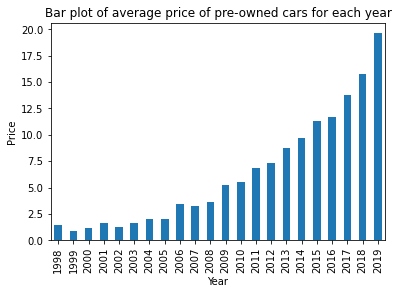

In [2976]:
df_cl["Year"]=df_cl["Year"].astype("int32")
df_cl.groupby("Year")["Price"].mean().plot(kind="bar")
plt.title("Bar plot of average price of pre-owned cars for each year")
plt.ylabel("Price")
plt.show()

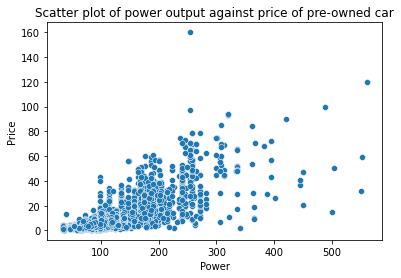

In [2974]:
sns.scatterplot(df_cl["Power"],df_cl["Price"])
plt.title("Scatter plot of power output against price of pre-owned car")
plt.show()

Conclusion:
* After fitting the data to all the models we can observe that the Gradient boosting regressor has performed better               comparatively with low bias error, low variance error, and low validation error. so we would consider Gradient boosting         regressor as our final model.
* From the feature importances table extracted out of the Gradient boosting regressor model, one can observe that the power       output of a car and year of manufacturing of a car have a greater impact on the target variable. 
* The above bar plot describes that the average price of pre-owned cars 
  increases from 1998 to 2019.
* The above scatter plot demonstrates that the price of pre-owned cars increases with an increase in the power output of a car.